In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn import linear_model
import warnings
import pickle
import xlrd

In [3]:
train = pd.read_excel('mobile phone.xlsx')
train.head()

,Merk,Seri,Memori,RAM,Harga
0,Iphone,7 Plus,128 GB,2 GB,3699000
1,Iphone,X,256 GB,3 GB,7350000
2,Iphone,8 Plus,64 GB,3 GB,5600000
3,Iphone,SE,128 GB,2 GB,4499000
4,Iphone,6s Plus,64 GB,2 GB,2928000


In [4]:
def _get_category_mapping(column):
    """ Return the mapping of a category """
    return dict([(cat, code) for code, cat in enumerate(column.cat.categories)])

In [5]:
train['Merk'] = train['Merk'].astype('category')
merk= _get_category_mapping(train['Merk'])
train['Merk'] = train['Merk'].cat.codes

train['Seri'] = train['Seri'].astype('category')
seri = _get_category_mapping(train['Seri'])
train['Seri'] = train['Seri'].cat.codes

train['Memori'] = train['Memori'].astype('category')
memori = _get_category_mapping(train['Memori'])
train['Memori'] = train['Memori'].cat.codes

train['RAM'] = train['RAM'].astype('category')
ram = _get_category_mapping(train['RAM'])
train['RAM'] = train['RAM'].cat.codes

In [7]:
X = train.iloc[:, 0:4].values
y= train.iloc[:, 4]

In [8]:
# Menjadi dataset ke dalam Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      399000       0.00      0.00      0.00         1
      408200       0.00      0.00      0.00         1
      484500       0.00      0.00      0.00         0
      499000       0.00      0.00      0.00         1
      559000       1.00      1.00      1.00         1
      565300       0.00      0.00      0.00         0
      599000       0.00      0.00      0.00         1
      649500       0.00      0.00      0.00         1
      650000       0.00      0.00      0.00         1
      670000       0.00      0.00      0.00         2
      682000       0.00      0.00      0.00         0
      690000       0.00      0.00      0.00         0
      695000       0.00      0.00      0.00         1
      699000       0.00      0.00      0.00         0
      749000       0.00      0.00      0.00         0
      755000       0.00      0.00      0.00         1
      775000       0.00      0.00      0.00         1
      778000       0.00    

In [20]:
df = pd.DataFrame ({'Real Values': y_test, 'Predicted Values': y_pred}) 
df

,Real Values,Predicted Values
743,695000,778000
656,1599000,699000
704,755000,690000
738,799000,959400
496,1500000,1049300
27,7700000,8500000
31,2250000,900000
553,5800000,7799000
682,1199000,1179000
495,3299000,2250000


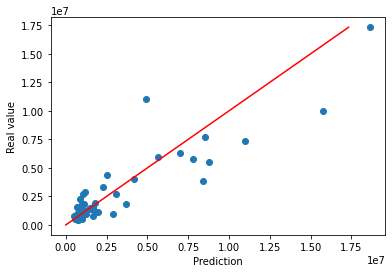

In [15]:
import matplotlib.pyplot as plt
# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

print('MAE:\t$%.2f' % mean_absolute_error(y_test, y_pred))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))

MAE:	$948103.26
MSLE:	0.23483


In [22]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  5.660377358490567
